# AEs, VAEs and GANs

Implement three models including autoencoders (AEs), variational autoencoders (VAEs), and generative adversarial networks (GANs).

---

## Task 1: Autoencoders vs. Principal Components Analysis
Principal components analysis (PCA) is a common used method for dimensionality reduction. It's an unsupervised technique that reduces the dimensionality of the data by **orthogonally transforming** the data into a set of principal components. The first principal component explains the most amount of the variation in the data in a single component, the second component explains the second most amount of the variation, etc. By choosing the top principal components that explain say 80-90% of the variation, the other components can be dropped since they do not significantly benefit the model.

Autoencoder is another unsupervised technique can be used for dimensionality reduction in which we leverage neural networks for the task of representation learning. Specifically, a **bottleneck** will be imposed in the network which forces a compressed knowledge representation of the original input.

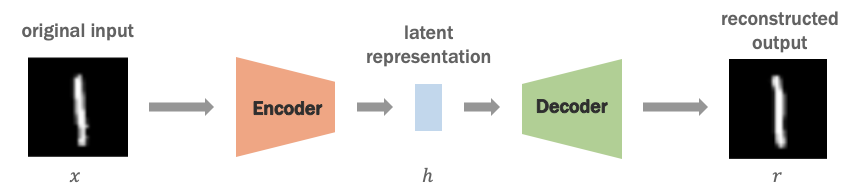


**Tasks**

In this task, you will build two models for dimensionality reduction based on PCA and Autoencoder, respectively. You will use the developed models on the handwritten digits and compare the performance. **The reduced dimension should be two so that the visualization is convenient.**

1. Load [MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) dataset and prepross the dataset.
2. Design a PCA model for dimensionality reduction. Please check [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for more information.
3. Implement a Autoencoder based on TensorFlow 2.x.
4. Compare the reconstruction losses (MSE) of PCA and Autoencoder on the test data.
5. Visualize the reduced results of PCA and Autoencoder.
6. Analysis the pros and cons of each model.

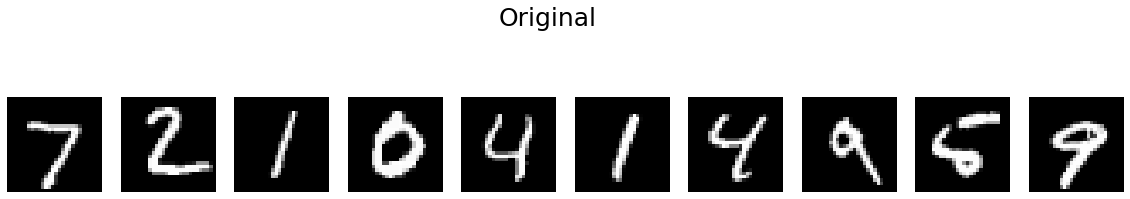

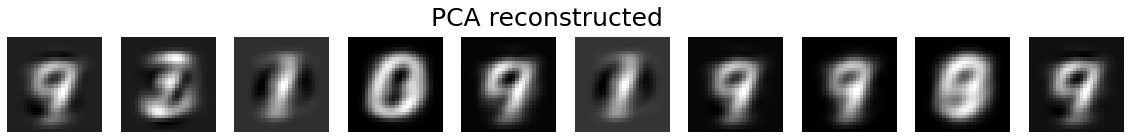

PCA reconstruction loss(MSE): 0.055669438


In [16]:
# TODO: write your code here
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Pre-processing (Normalize data)
x_train /= 255
x_test /= 255

# Initialize PCA model
pca = PCA(n_components=2)
pca.fit(x_train)

# Transforming training and test sets
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# PCA Reconstruction
x_test_recon = pca.inverse_transform(x_test_pca)

# MSE reconstruction loss
x_pca_loss = ((x_test - x_test_recon)**2).mean()

# Displaying original and reconstructed digits
n = 10  # no. of digits to be displayed
plt.figure(figsize=(20,4))
for i in range(0,n):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    plt.axis('off')
    plt.suptitle('Original', size=25)
plt.show()

plt.figure(figsize=(20,4))
for i in range(0,n):
    plt.subplot(2, n, i+1)
    plt.imshow(x_test_recon[i].reshape(28,28))
    plt.axis('off')
    plt.gray()
    plt.suptitle('PCA reconstructed', size=25)
plt.show()

# Printing the reconstruction loss for PCA

print("PCA reconstruction loss(MSE):", x_pca_loss)

Epoch 1/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 5/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 6/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 7/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 8/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 9/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 10/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2312 - val_loss: 0.2313

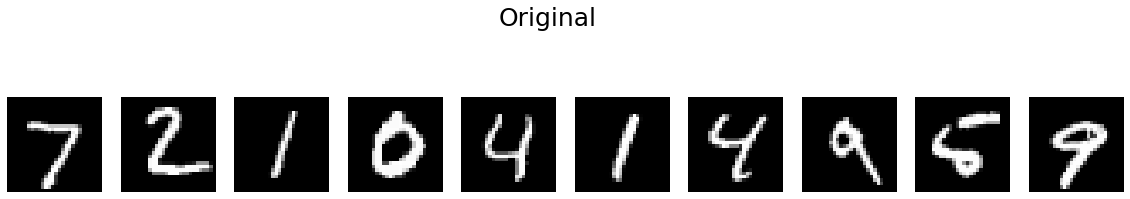

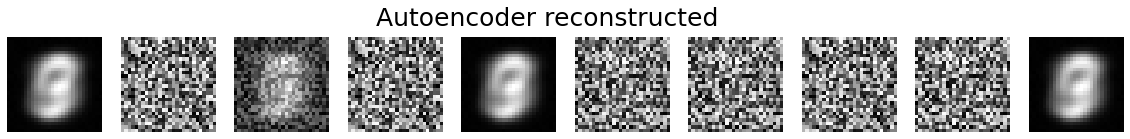

In [18]:
import keras
from keras.models import Model
from keras.layers import Input, Dense

# Autoencoder for dimensionality reduction
enc_dim = 2  # Reduced dimension
img_input = Input(shape=(784,))
encoded = Dense(enc_dim, activation='relu')(img_input)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(img_input, decoded)

# Compile and train autoencoder
autoencoder.compile(optimizer = 'adadelta', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=20, batch_size = 512, shuffle= True, 
                validation_data=(x_test, x_test))
print(autoencoder.summary())
# Encoder & Decoder
encoder = Model(img_input, encoded)
enc_input = Input(shape=(enc_dim,))
d_layer = autoencoder.layers[-1]
decoder = Model(enc_input, d_layer(enc_input))

# Encoded and Decoded images
enc_imgs = encoder.predict(x_test)
dec_imgs = decoder.predict(enc_imgs)

# Reconstructed image
n = 10  # no. of digits to be displayed
plt.figure(figsize=(20,4))
for i in range(0,n):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    plt.axis('off')
    plt.suptitle('Original', size=25)
plt.show()

plt.figure(figsize=(20,4))
for i in range(0,n):
    plt.subplot(2, n, i+1)
    plt.imshow(dec_imgs[i].reshape(28,28))
    plt.axis('off')
    plt.gray()
    plt.suptitle('Autoencoder reconstructed', size=25)
plt.show()

## Task 2: Variational Autoencoders
VAE is a generative model that could be used to generate complex datasets such as images of fictional celebrity faces and high-resolution digital artwork. In this task, your goal is to build a VAE model to create high-quality images of faces.

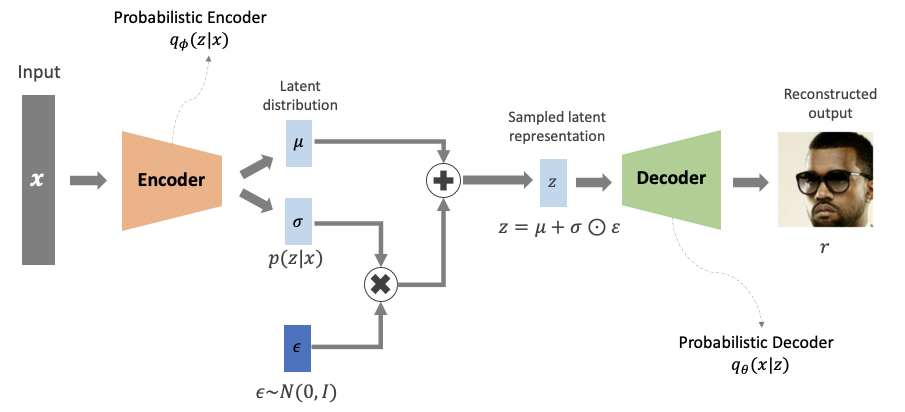

**Dataset**

CelebFaces Attributes Dataset ([CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter.

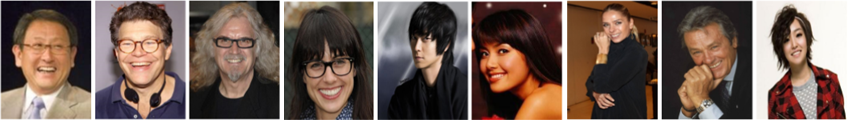

**Tasks**

1. Download CelebFaces Attributes ([CelebA](https://www.kaggle.com/jessicali9530/celeba-dataset)) dataset  as your training data.
2. Load and prepross the dataset.
    - You should center crop the images so that each one will be 128x128 since the shape of each original image is 218x178. Please check [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) and [CenterCrop](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/CenterCrop) for details.
3. Build a VAE model based on TensorFlow 2.x and plot out the model. Check [here](https://www.tensorflow.org/tutorials/generative/cvae) for more information.
4. Train your model and visualize the training history including the total loss, reconstruction loss, and KL loss.
5. Display several generated images.

In [2]:
import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers

data_dir = pathlib.Path('C:\\Users\\vinay\\HW_DL_8930\\HW-5\\img_align_celeba')
bs = 32

# Data pre-processing
train_img_files = tf.keras.preprocessing.image_dataset_from_directory(
   data_dir, validation_split=0.2, subset="training", labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=bs, image_size=(128,128), shuffle=True, 
    seed=123,interpolation='bilinear', follow_links=False
)

test_img_files = tf.keras.preprocessing.image_dataset_from_directory(
   data_dir, validation_split=0.2, subset="validation", labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=bs, image_size=(128,128), shuffle=True, 
    seed=123,interpolation='bilinear', follow_links=False
)

# Data Normalization(pre-processing)
norm_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
tr_norm_imgs = train_img_files.map(lambda x, y: (norm_layer(x), y))
test_norm_imgs = test_img_files.map(lambda x, y: (norm_layer(x), y))

Found 202599 files belonging to 1 classes.
Using 162080 files for training.
Found 202599 files belonging to 1 classes.
Using 40519 files for validation.


In [3]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tr_norm_imgs.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_norm_imgs.cache().prefetch(buffer_size=AUTOTUNE)

In [4]:
# VAE architecture
class CVAE(tf.keras.Model):
    
    def __init__(self, latent_dim):
        super(CVAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(128,128,3)),
                tf.keras.layers.Conv2D(
                    filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Conv2D(
                    filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(latent_dim + latent_dim),
            ]
        )
        
        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
                tf.keras.layers.Dense(units=32*32*32, activation=tf.nn.relu),
                tf.keras.layers.Reshape(target_shape=(32,32, 32)),
                tf.keras.layers.Conv2DTranspose(
                    filters=64, kernel_size=3, strides=2, padding='same',activation='relu'),
                tf.keras.layers.Conv2DTranspose(
                    filters=32, kernel_size=3, strides=2, padding='same',activation='relu'),
                tf.keras.layers.Conv2DTranspose(
                    filters=3, kernel_size=3, strides=1, padding='same'),
            ]
        )
        
    def call(self, data):
        z = self.encoder(data)
        return self.decoder(z)
        
    @tf.function
    def sample(self, eps=None):
        if eps is None:
            eps = tf.random.normal(shape=(100, self.latent_dim))
        return self.decode(eps, apply_sigmoid=True)
        
    def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar
        
    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean
        
    def decode(self, z, apply_sigmoid=False):
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

In [11]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(-.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
                         axis=raxis)


def total_loss(model, x):
    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    x_logit = model.decode(z)
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
    
    with tf.GradientTape() as tape:
        loss = total_loss(model, x)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [12]:
epochs = 2
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 10

random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

#train_imgs=[]
#for image_batch, label_batch in norm_imgs:
    #train_imgs.append(image_batch)

In [13]:
def generate_and_save_images(model, epoch, test_sample):
    mean, logvar = model.encode(test_sample)
    z = model.reparameterize(mean, logvar)
    predictions = model.sample(z)
    fig = plt.figure(figsize=(10, 10))
    
    for i in range(predictions.shape[0]):
        plt.subplot(5, 2, i + 1)
        plt.imshow(predictions[i, :, :, 0])
        plt.axis('off')
        
    # tight_layout minimizes the overlap between 2 sub-plots
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [14]:
assert bs >= num_examples_to_generate
for img_batch, labl_batch in train_ds.take(1):
    test_sample = img_batch[0:num_examples_to_generate, :, :, :]

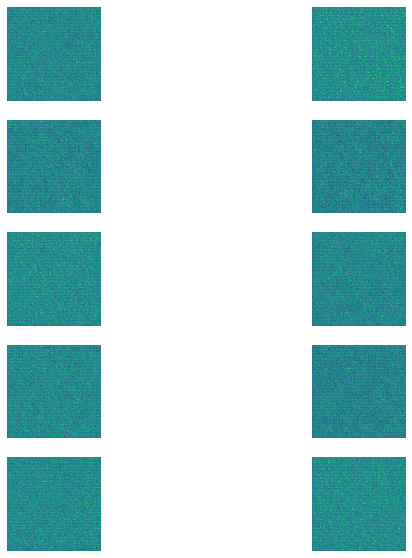

Epoch: 1, Test set loss: -28900.2421875, time elapse for current epoch: 2837.327572584152


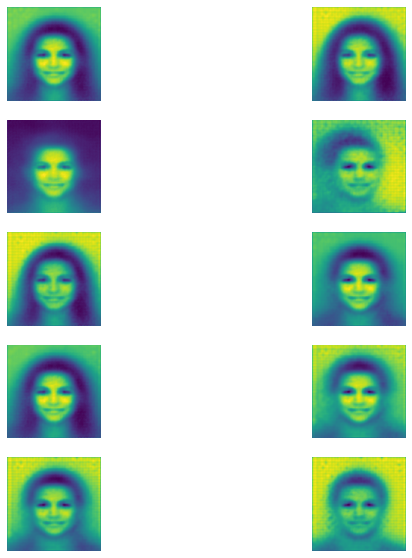

Epoch: 2, Test set loss: -28873.560546875, time elapse for current epoch: 2961.7527854442596


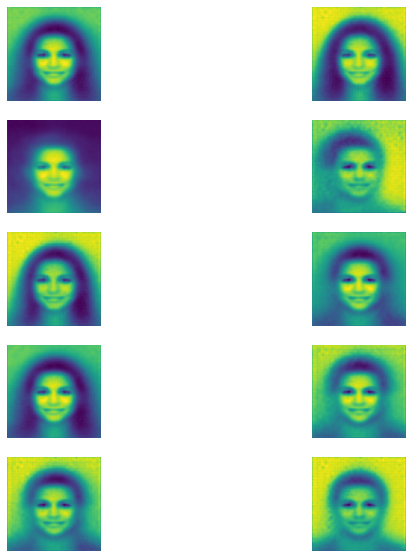

In [15]:
import time

generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
    start_time = time.time()
    for img, lbls in train_ds:
        train_step(model, img, optimizer)
    end_time = time.time()
    
    loss = tf.keras.metrics.Mean()
    for test_imgs, test_lbls in test_ds:
        loss(total_loss(model, test_imgs))
    t_loss = -loss.result()
    
    #display.clear_output(wait=False)
    print('Epoch: {}, Test set loss: {}, time elapse for current epoch: {}'
          .format(epoch, t_loss, end_time - start_time))
    generate_and_save_images(model, epoch, test_sample)

## Task 3: Generative Adversarial Networks
A generative adversarial network (GAN) is a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in 2014. Two neural networks contest with each other in a game (in the form of a zero-sum game, where one agent's gain is another agent's loss). In this task, you need to create a GAN to generate specific class of figures for given condition (class). For example, give a label "3" (which represents Dress), you will use your network to generate a figure of Dress.

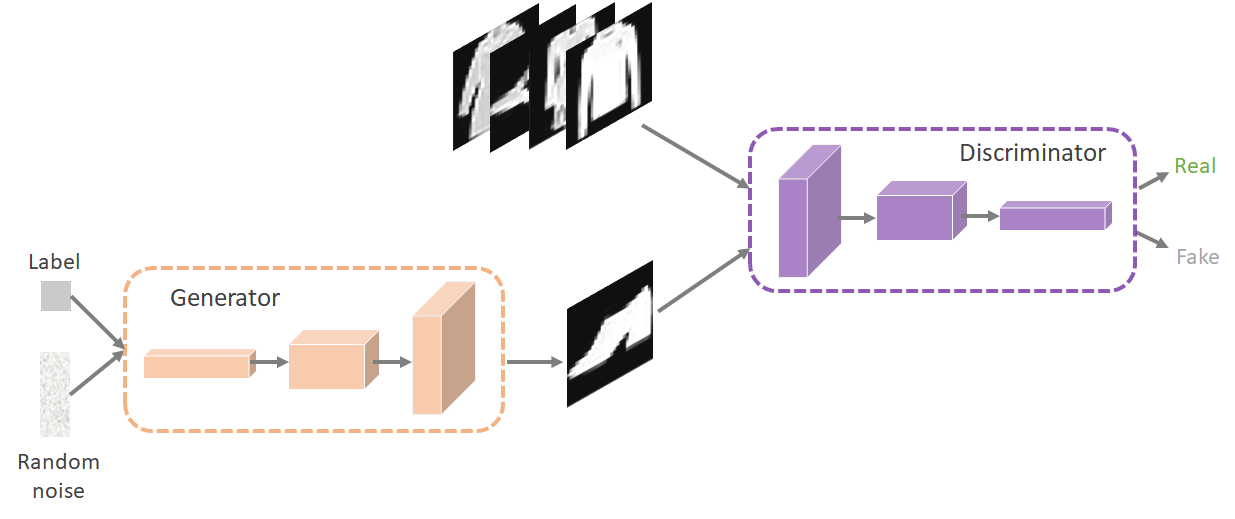



**Dataset**

[Fashion-MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

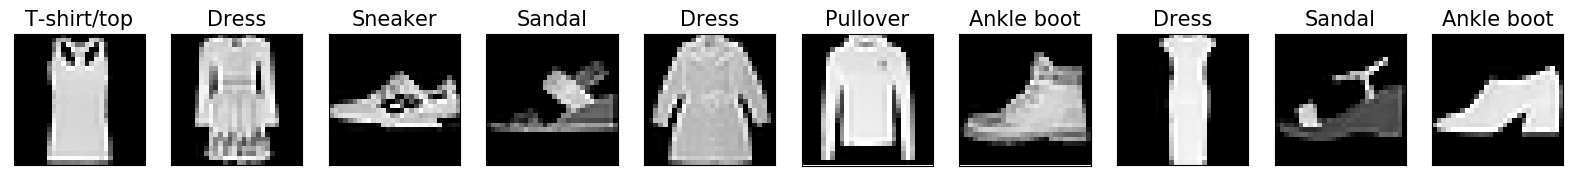

**Tasks**

1. Download the Fashion-Mnist dataset from Canvas and look into the data.
    - The Fashion-Mnist dataset has 60000 training data. Each image is a 28x28 grayscale image, associated with a label from 10 classes. 
2. Load and prepross the dataset.
3. Build a GAN model based on TensorFlow 2.x and plot out the model.
4. Train your model and visualize the training history including the loss of Generator and Discriminator.
5. Plot the intermidiate results through the training procedure. eg.: After each 20 epochs in training plot a grid of generated results. (check this [resource](https://www.tensorflow.org/tutorials/generative/dcgan) to figure out how to save the model and generate the intermediate results during the training)
6. Display final generated results for each of ten classes and discuss your results.

In [24]:
import pandas as pd
# TODO: write your code here
train_data = pd.read_csv('./fashion-mnist_train.csv')
train_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [32]:
x_train = train_data.drop('label', axis=1)
x_train = x_train.values
# Reshaping data
x_train = x_train.reshape(-1,28,28,1)
x_train = x_train.astype('float32')
print(x_train.shape)

(60000, 28, 28, 1)


In [33]:
# Normalization of images to [-1,1]
x_train = (x_train - 127.5)/ 127.5
print(x_train.max(), x_train.min())

1.0 -1.0


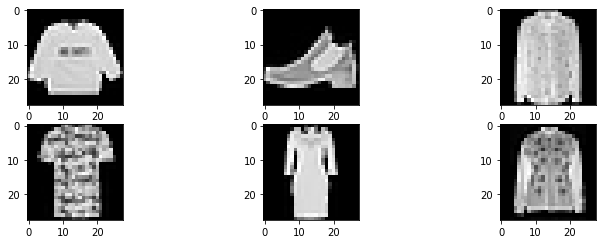

In [34]:
# Displaying sample training images
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])

In [35]:
# Building generator for GAN
gen = tf.keras.Sequential()
gen.add(layers.Dense(7*7*128, input_shape=[100]))
gen.add(layers.Reshape([7,7,128]))
gen.add(layers.BatchNormalization())
gen.add(layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", activation="relu"))
gen.add(layers.BatchNormalization())
gen.add(layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation="tanh"))

gen.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 1)         1601      
Total params: 840,705
Trainable params: 840,321
Non-trainable params: 384
______________________________________________

In [36]:
# Building discriminator for GAN
dis = tf.keras.Sequential()
dis.add(layers.Conv2D(64, kernel_size=5, strides=2, padding='same', input_shape=[28,28,1]))
dis.add(layers.LeakyReLU())
dis.add(layers.Dropout(0.5))
dis.add(layers.Conv2D(128, kernel_size=5, strides=2, padding='same', input_shape=[28,28,1]))
dis.add(layers.LeakyReLU())
dis.add(layers.Dropout(0.5))
dis.add(layers.Flatten())
dis.add(layers.Dense(1, activation='sigmoid'))

dis.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)             

In [39]:
# Compiling discriminator and GAN
gan = tf.keras.Sequential([gen,dis])
dis.compile(optimizer = 'adam', loss = 'binary_crossentropy')
dis.trainable = False

gan.compile(optimizer='adam', loss='binary_crossentropy')
gan.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


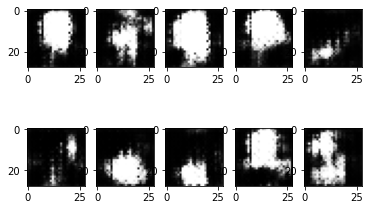

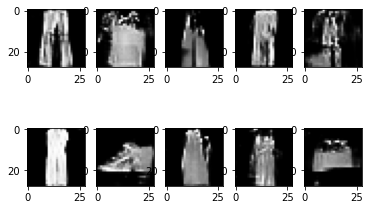

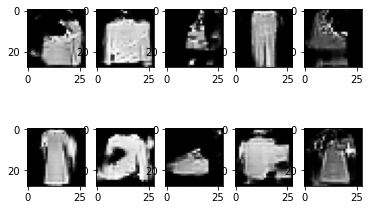

In [40]:
# Training Loop
epochs = 50
n = 100       # noise shape
b_s = 100     # batch size
dis_loss = []
gen_loss = []
with tf.device('/gpu:0'):
    for epoch in range(epochs):
        for i in range(x_train.shape[0]//b_s):
            noise = np.random.normal(size=[b_s, n])
            gen_img = gen.predict_on_batch(noise)
            
            train_ds = x_train[i*b_s:(i+1)*b_s]
            
            # discriminator trained on real images
            t_r = np.ones(shape=(b_s, 1))
            dis.trainable = True
            dis_rloss = dis.train_on_batch(train_ds, t_r)
            
            # discriminator trained on fake images
            t_f = np.zeros(shape=(b_s, 1))
            dis_floss = dis.train_on_batch(gen_img, t_f)
            
            # generator training
            g_noise =  np.random.normal(size=[b_s, n])
            t_g = np.ones(shape=(b_s, 1))
            dis.trainable = False
            g_loss = gan.train_on_batch(g_noise, t_g)
        
        dis_loss.append(dis_rloss+dis_floss)
        gen_loss.append(g_loss)
        
        # Plot generated images after every 20 epochs
        if epoch % 20 == 0:
            s = 10
            x_gen = gen.predict(np.random.normal(loc=0, scale=1, size=(s, 100)))
            
            for l in range(s):
                plt.subplot(2, 5, l+1)
                plt.imshow(x_gen[l].reshape(28,28), cmap='gray')
            
            plt.show()

            

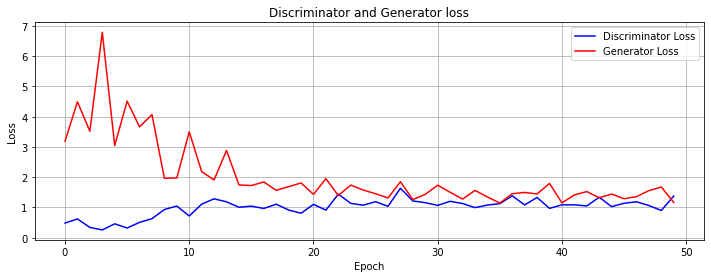

In [42]:
# Plotting discriminator and generator losses
fig = plt.figure(figsize=(12, 4))
plt.plot(dis_loss, c='b')
plt.plot(gen_loss, c='r')
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.title('Discriminator and Generator loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()